<a href="https://colab.research.google.com/github/heroideallstar/MachineLearn_Alura/blob/main/redes_neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aprendizado de maquina (deep learning)
##Redes Neurais
Classificação de roupas a partir de um dataset usando o keras e o tensorflow

###Importando as bibliotecas e os dados
Carregando os do fashion_[mnist](http://yann.lecun.com/exdb/mnist/) e os visualizando.

A função load_data devolve duas tuplas uma de treino e uma de teste que serão separadas em imagens_treino e imagens_teste


In [33]:
import tensorflow
from tensorflow import keras
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

### Entendendo o dataset
A dimensão das imagens é 28x28 pixels e cada um dos grupos tem um conjunto grande de imagens ao total 70000. Vamos visualizar algumas imagens usando o matplotlib

In [10]:
imagens_treino.shape

(60000, 28, 28)

In [11]:
imagens_teste.shape

(10000, 28, 28)

Text(0.5, 1.0, '9')

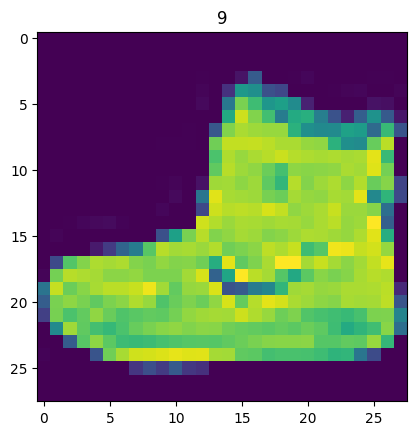

In [13]:
import matplotlib.pyplot as plt
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

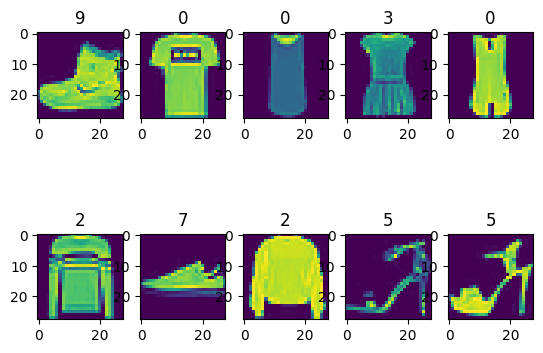

In [16]:
total_de_classificacoes = 10
for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(identificacoes_treino[imagem])

Vamos importar as label das imagens uma vez que so veio as identificações e não seus nomes. Tiramos essas informações da [documentação do mnist](https://github.com/zalandoresearch/fashion-mnist).


In [22]:
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandálha', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

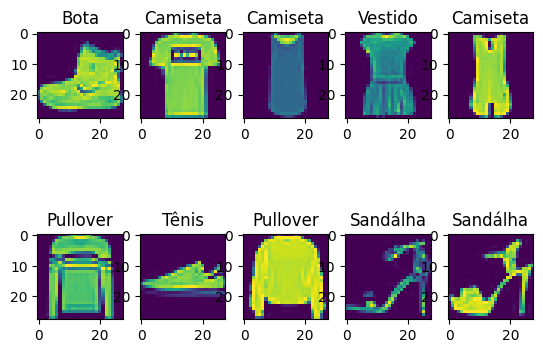

In [23]:
for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

### Criando o modelo: Multilayers

#### Camada Zero: Entrada
Organizando as imagens, quebrando as dimensões e transformando num vetor

#### Camada Um: Processamento
Fazer cada pedaço da imagem passar por uma etapa da processamento (Densa).
Criando 256 funções densas completamente conectadas a camada anterior que achata as imagens.
A função usada é o ReLU dentro do tensorflow uma função não linear.

#### Camada Dois: Saida
Usando o softmax que diz a probabilidade de cada imagem pertencer a cada uma das categorias.

In [26]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), #Entrada
    keras.layers.Dense(256, activation = tensorflow.nn.relu), #Processamento
    keras.layers.Dense(10, activation = tensorflow.nn.softmax) #Saida
])
modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy') #loss = entropia categorica cruzada esparsa
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 11s 6ms/step - loss: 4.4387


### Normalização do modelo


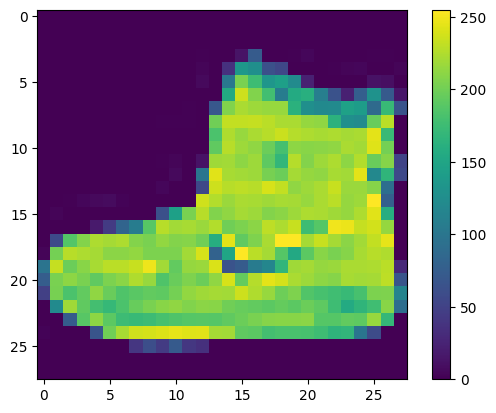

In [27]:
plt.imshow(imagens_treino[0])
plt.colorbar()

In [28]:
imagens_treino = imagens_treino/float(255) #normalização

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), #Entrada
    keras.layers.Dense(256, activation = tensorflow.nn.relu), #Processamento
    keras.layers.Dense(10, activation = tensorflow.nn.softmax) #Saida
])
modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy') #loss = entropia categorica cruzada esparsa
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 10s 5ms/step - loss: 0.4843


In [29]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), #Entrada
    keras.layers.Dense(256, activation = tensorflow.nn.relu), #Processamento
    keras.layers.Dense(128, activation = tensorflow.nn.relu), #Teste
    keras.layers.Dense(10, activation = tensorflow.nn.softmax) #Saida
])
modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy') #loss = entropia categorica cruzada esparsa
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 9s 5ms/step - loss: 0.4748


In [30]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), #Entrada
    keras.layers.Dense(256, activation = tensorflow.nn.relu), #Processamento
    keras.layers.Dense(128, activation = tensorflow.nn.relu), #Teste1
    keras.layers.Dense(64, activation = tensorflow.nn.relu), #Teste2
    keras.layers.Dense(10, activation = tensorflow.nn.softmax) #Saida
])
modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy') #loss = entropia categorica cruzada esparsa
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 11s 5ms/step - loss: 0.4905


O menor numero de perda foi o que adicionamos apemas uma layer a mais

In [53]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), #Entrada
    keras.layers.Dense(256, activation = tensorflow.nn.relu), #Processamento
    keras.layers.Dense(128, activation = tensorflow.nn.relu), #Teste
    keras.layers.Dropout(0.2), #Normalização
    keras.layers.Dense(10, activation = tensorflow.nn.softmax) #Saida
])
modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) #loss = entropia categorica cruzada esparsa
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 10, validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 2.2797 - accuracy: 0.5664 - val_loss: 1.4267 - val_accuracy: 0.5353
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.0151 - accuracy: 0.6286 - val_loss: 0.7502 - val_accuracy: 0.7272
Epoch 3/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.8468 - accuracy: 0.6683 - val_loss: 0.6859 - val_accuracy: 0.7365
Epoch 4/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.8057 - accuracy: 0.6800 - val_loss: 0.6854 - val_accuracy: 0.7278
Epoch 5/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.7587 - accuracy: 0.6967 - val_loss: 0.6267 - val_accuracy: 0.7590
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.7138 - accuracy: 0.7159 - val_loss: 0.6217 - val_accuracy: 0.7494
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.6855 - accuracy: 0.7344 - val_loss: 0.6782 - val_a

In [55]:
from tensorflow.keras.models import load_model
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

In [50]:
historico.history

{'loss': [2.3218255043029785,
  0.5966720581054688,
  0.5238140225410461,
  0.4926733672618866,
  0.4410420060157776,
  0.41644641757011414,
  0.3957560658454895,
  0.38286465406417847,
  0.3661326766014099,
  0.36388278007507324],
 'accuracy': [0.753125011920929,
  0.8067499995231628,
  0.8213541507720947,
  0.8273749947547913,
  0.8408958315849304,
  0.8487916588783264,
  0.8576666712760925,
  0.8616041541099548,
  0.867270827293396,
  0.8682916760444641],
 'val_loss': [0.6032936573028564,
  0.5234144926071167,
  0.5184301733970642,
  0.4591709077358246,
  0.46457377076148987,
  0.4663468301296234,
  0.4230825901031494,
  0.4319615960121155,
  0.4044724106788635,
  0.42358890175819397],
 'val_accuracy': [0.812666654586792,
  0.809333324432373,
  0.8132500052452087,
  0.8340833187103271,
  0.840499997138977,
  0.8415833115577698,
  0.8502500057220459,
  0.8551666736602783,
  0.8585833311080933,
  0.8570833206176758]}

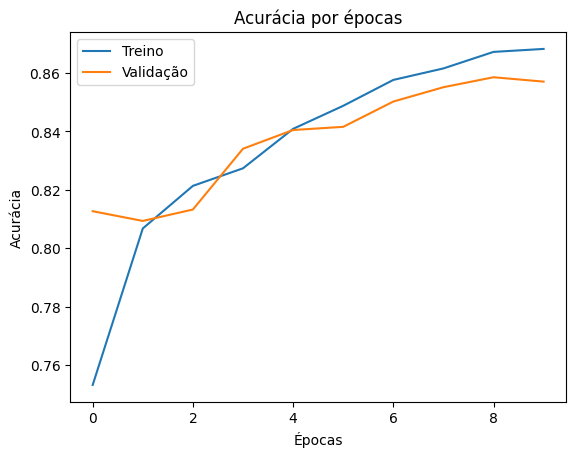

In [51]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

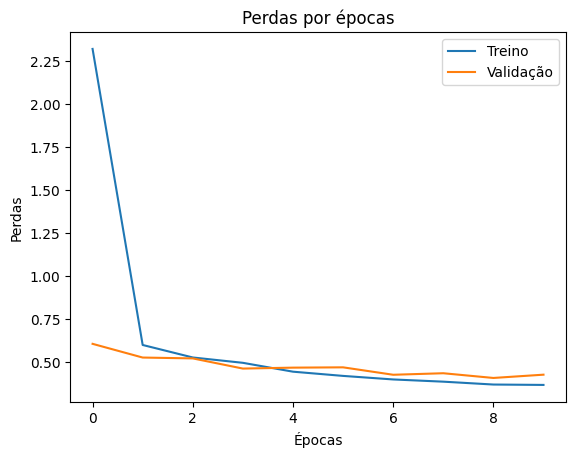

In [52]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino', 'Validação'])

###Testes: Predições

In [35]:
import numpy as np

In [57]:
testes = modelo.predict(imagens_teste)
print('Resultado do teste:',np.argmax(testes[1]))
print('Numero da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado do teste do modelo salvo:',np.argmax(testes_modelo_salvo[1]))
print('Numero da imagem de teste do modelo salvo:', identificacoes_teste[1])

313/313 [==============================] - 1s 2ms/step
Resultado do teste: 2
Numero da imagem de teste: 2
313/313 [==============================] - 1s 3ms/step
Resultado do teste do modelo salvo: 2
Numero da imagem de teste do modelo salvo: 2


In [39]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 63.5846 - accuracy: 0.8225
Perda do teste: 63.58458709716797
Acurácia do teste: 0.8224999904632568
